In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import *

import ipywidgets as widgets
from ipywidgets import interact

import matplotlib.animation as animation
from IPython.display import HTML

In [14]:
happydf = pd.read_csv("2019.csv", sep=",")
happydf

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [15]:
social = happydf.Social_support
gdp = happydf.GDP_per_capita
life = happydf.Healthy_life_expectancy
corruption = happydf.Perceptions_of_corruption

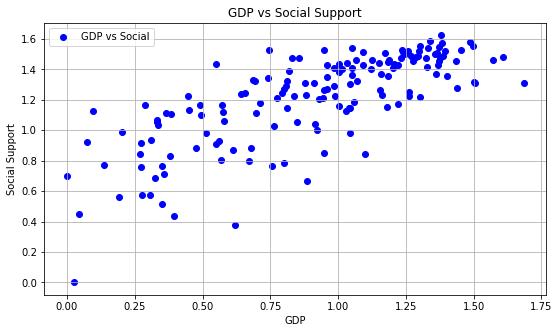

In [16]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

ax.scatter(gdp, social, label="GDP vs Social", color="blue")
ax.set_title("GDP vs Social Support")
ax.set_xlabel("GDP")
ax.set_ylabel("Social Support")
ax.grid()
ax.legend()

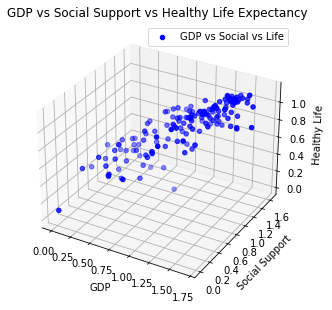

In [17]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(projection="3d")

ax.scatter(gdp, social, life, label="GDP vs Social vs Life", color="blue")

ax.set_title("GDP vs Social Support vs Healthy Life Expectancy")
ax.set_xlabel("GDP")
ax.set_ylabel("Social Support")
ax.set_zlabel("Healthy Life")
ax.grid()
ax.legend()

In [18]:
%matplotlib widget

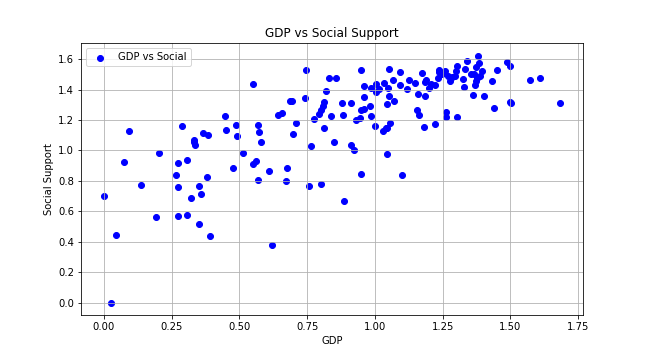

In [19]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

ax.scatter(gdp, social, label="GDP vs Social", color="blue")
ax.set_title("GDP vs Social Support")
ax.set_xlabel("GDP")
ax.set_ylabel("Social Support")
ax.grid()
ax.legend()

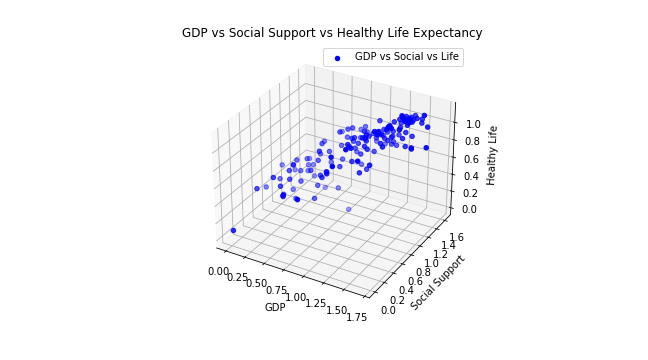

In [20]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(projection="3d")

ax.scatter(gdp, social, life, label="GDP vs Social vs Life", color="blue")

ax.set_title("GDP vs Social Support vs Healthy Life Expectancy")
ax.set_xlabel("GDP")
ax.set_ylabel("Social Support")
ax.set_zlabel("Healthy Life")
ax.grid()
ax.legend()

***

## GUI Tools

In [11]:
def f(x):
    return x

interact(f, x=50);              #int get slider, semicolon tar bort output line

interactive(children=(IntSlider(value=50, description='x', max=150, min=-50), Output()), _dom_classes=('widget…

In [19]:
def f(x):
    return x

interact(f, x=True);   #boolean ger checkbox

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

In [20]:
def f(x):
    return x

interact(f, x="50"); #string ger input box

interactive(children=(Text(value='50', description='x'), Output()), _dom_classes=('widget-interact',))

In [22]:
def f(x):
    return x

interact(f, x=[50,40,30,20,10]); #lista ger dropdown

interactive(children=(Dropdown(description='x', options=(50, 40, 30, 20, 10), value=50), Output()), _dom_class…

***

## Reconfiguring example

Text(0, 0.5, 'Corruption')

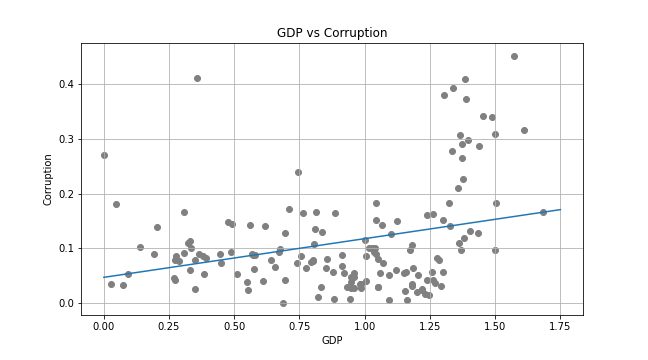

In [21]:
deg = 1
data_reg = np.polyfit(gdp, corruption, deg)
xp = np.linspace(0.0, 1.75, 156)
yp = np.polyval(data_reg, xp)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
ax.scatter(gdp, corruption, label="GDP vs Corruption", color="gray")
ax.plot(xp, yp, label="Pol. Reg.")
ax.set_title("GDP vs Corruption")
ax.grid()
ax.set_xlabel("GDP")
ax.set_ylabel("Corruption")

interactive(children=(IntSlider(value=3, description='level', max=5, min=1), Output()), _dom_classes=('widget-…

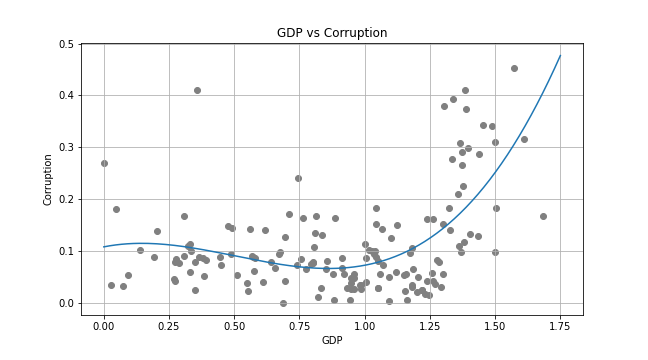

In [22]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

def erase_plot():
    ax.clear()
    
def f(level):
    erase_plot()
    deg = level
    data_reg = np.polyfit(gdp, corruption, deg)
    xp = np.linspace(0.0, 1.75, 156)
    yp = np.polyval(data_reg, xp)
    ax.scatter(gdp, corruption, label="GDP vs Corruption", color="gray")
    ax.plot(xp, yp, label="Pol. Reg.")
    ax.set_title("GDP vs Corruption")
    ax.grid()
    ax.set_xlabel("GDP")
    ax.set_ylabel("Corruption")
    
interact(f, level=widgets.IntSlider(min=1, max=5, step=1, value=3)); #widgets documentation

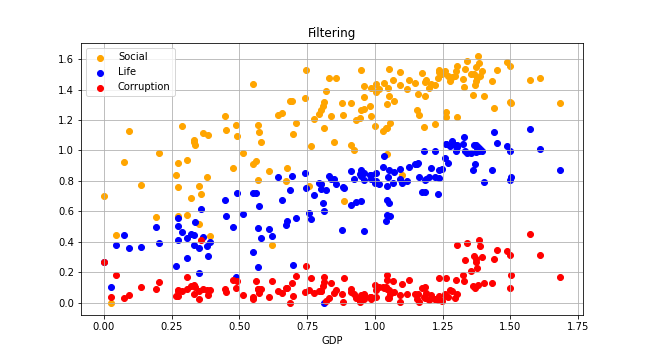

In [23]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

ax.scatter(gdp, social, label="Social", color="orange")
ax.scatter(gdp, life, label="Life", color="blue")
ax.scatter(gdp, corruption, label="Corruption", color="red")
ax.set_xlabel("GDP")
ax.grid()
ax.set_title("Filtering")
ax.legend()


interactive(children=(Checkbox(value=False, description='Social'), Checkbox(value=False, description='Life'), …

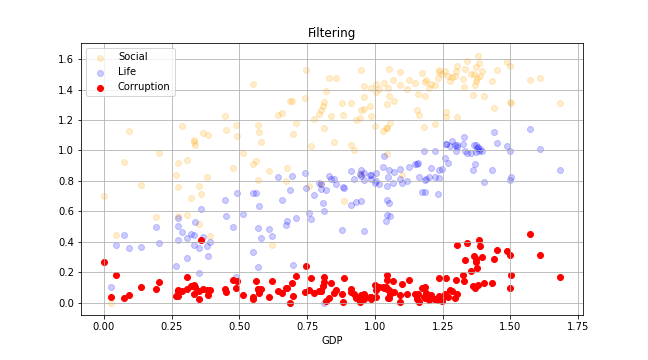

In [24]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

def erase_plot():
    ax.clear()
    
def f(Social, Life, Corruption):
    erase_plot()
    if Social:
        ax.scatter(gdp, social, label="Social", color="orange")
    else:
        ax.scatter(gdp, social, label="Social", color="orange", alpha=0.2)
        
    if Life:
        ax.scatter(gdp, life, label="Life", color="blue")
    else:
        ax.scatter(gdp, life, label="Life", color="blue", alpha=0.2)
        
    if Corruption:
        ax.scatter(gdp, corruption, label="Corruption", color="red")
    else:
        ax.scatter(gdp, corruption, label="Corruption", color="red", alpha=0.2)
        
    ax.set_xlabel("GDP")
    ax.grid()
    ax.set_title("Filtering")
    ax.legend()
    
interact(f, Social=False, Life=False, Corruption=True);


***

## Animations

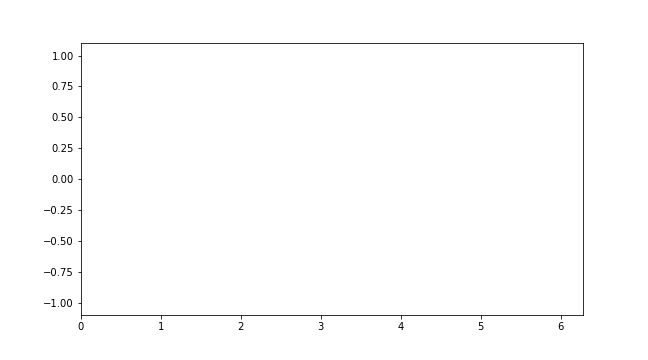

In [25]:
x_val = np.linspace(0, 2*np.pi, 100)
y_val = np.sin(x_val)

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([-1.1, 1.1])

dot, = ax.plot([], [], 'o', color="red")
linegraph, = ax.plot([],[], color="pink")

def animate(interval):
    dot.set_data(x_val[interval], y_val[interval])
    linegraph.set_data(x_val[:interval], y_val[:interval])
    
anim = animation.FuncAnimation(fig, animate, frames=len(x_val), interval=50)

In [26]:
HTML(anim. to_jshtml())